In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

tit_path = Path('/media/WDB/Backup/Projects/data')

tit_csv = tit_path / 'titanic_data.csv'

tit_data = pd.read_csv(tit_csv)

In [2]:
tit_data.boat.unique()
tit_data.dtypes

pclass        int64
survived      int64
name         object
sex          object
age          object
sibsp         int64
parch         int64
ticket       object
fare         object
cabin        object
embarked     object
boat         object
body         object
home.dest    object
dtype: object

In [3]:
tit_data.replace('?', np.nan, inplace=True)
data = tit_data.astype({"age" : np.float64, "fare": np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

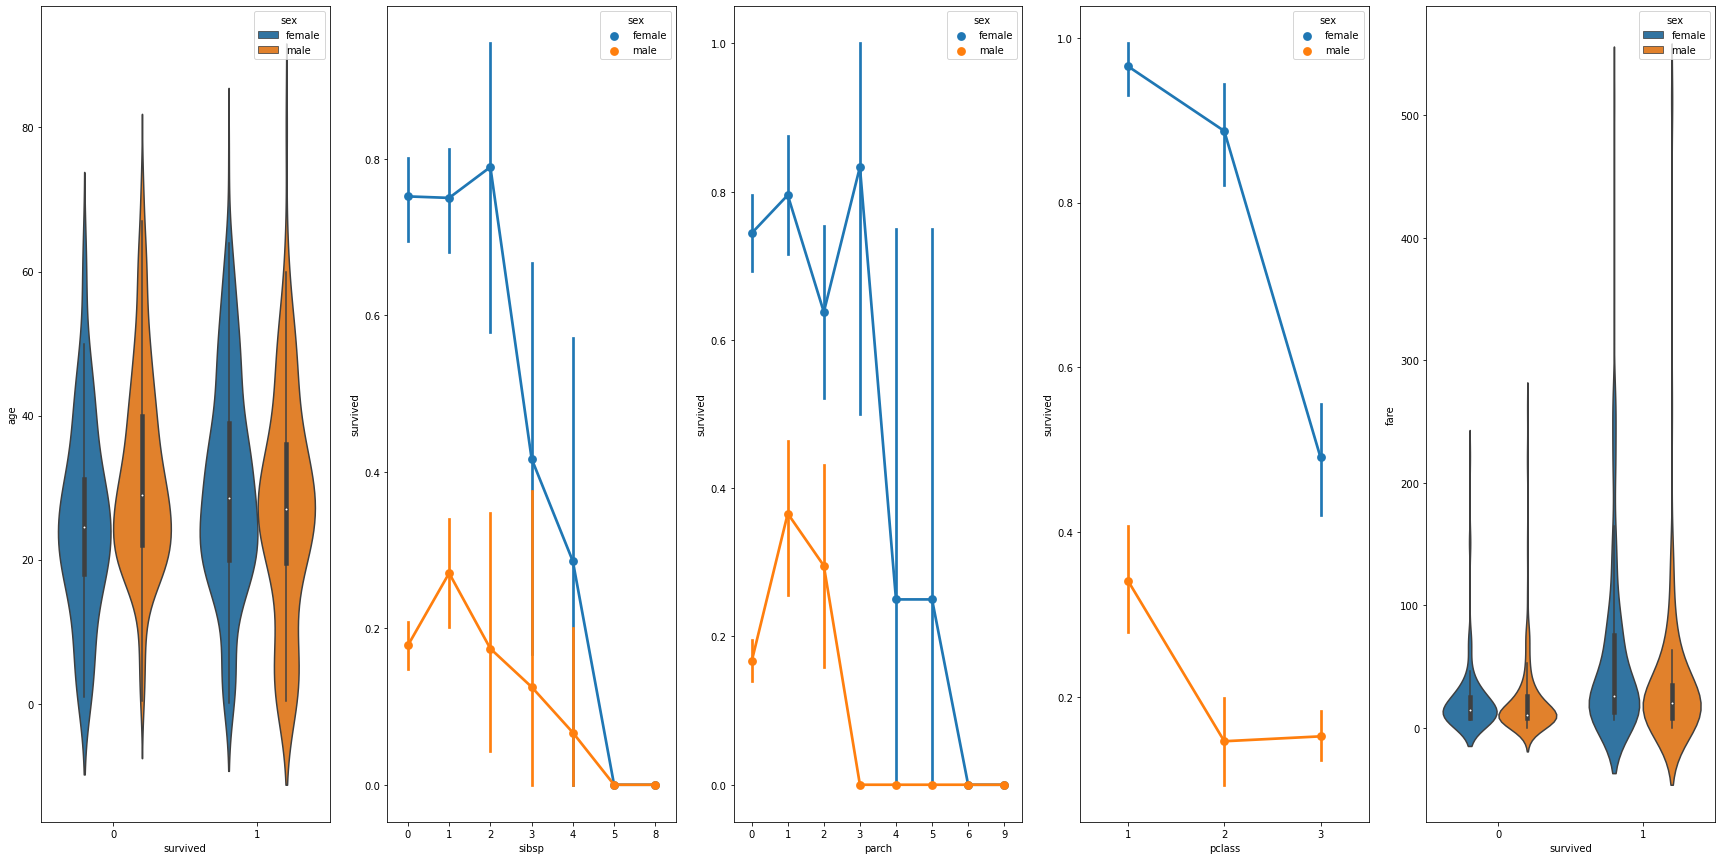

In [4]:
fig, axs = plt.subplots(ncols=5, figsize=(30,15))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [5]:
data.sex.replace({'male': 1, 'female': 0}, inplace=True)

In [6]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [7]:
data['relatives'] = data.apply(lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)

In [8]:
data.corr().abs()[['survived']]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [9]:
data = data[['sex', 'pclass', 'age', 'relatives', 'fare', 'survived']].dropna()

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex', 'pclass', 'age', 'relatives', 'fare']], data.survived, test_size=0.2, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [12]:
from sklearn.naive_bayes import GaussianNB
model_sk = GaussianNB()
model_sk.fit(X_train, y_train)

GaussianNB()

In [13]:
from sklearn import metrics
predict_test = model_sk.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [15]:
import tensorflow as tf
# from tf.keras.models import Sequential
from tensorflow.keras.layers import Dense 

model = tf.keras.Sequential()

model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

TypeError: Parameter to MergeFrom() must be instance of same class: expected tensorflow.TensorShapeProto got tensorflow.TensorShapeProto.

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(metrics.accuracy_score(y_test, y_pred))